In [38]:
!pip install pydicom
!ls


from google.colab import drive
import pandas as pd
import pydicom as dicom
drive.mount('/content/drive',force_remount=True)

drive  sample_data
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

project_path = "/content/drive/My Drive/Colab Notebooks/Capstone/"


In [0]:
#from zipfile import ZipFile
#with ZipFile(project_path+'rsna-pneumonia-detection-challenge.zip', 'r') as z:
#  #print(z)
#  z.extractall(path=project_path+'project_data/')

In [0]:
#drive.flush_and_unmount()

In [3]:
labels = pd.read_csv(project_path+"stage_2_train_labels.csv")
labels.fillna(0,inplace=True)
labels['x_start'] = labels['x']
labels['x_end'] = labels['x'] + labels['width']
labels['y_start'] = labels['y']
labels['y_end'] = labels['y']+labels['height']
labels.drop(['x','y','width','height'],axis=1,inplace=True)
labels.head(-1)

,patientId,Target,x_start,x_end,y_start,y_end
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,0.0,0.0,0.0,0.0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,0.0,0.0,0.0,0.0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,0.0,0.0,0.0,0.0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,0.0,0.0,0.0,0.0
4,00436515-870c-4b36-a041-de91049b9ab4,1,264.0,477.0,152.0,531.0
...,...,...,...,...,...,...
30221,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,1,609.0,849.0,464.0,748.0
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,1,185.0,413.0,298.0,677.0
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,0,0.0,0.0,0.0,0.0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,0,0.0,0.0,0.0,0.0


In [4]:
class_data = pd.read_csv(project_path+'stage_2_detailed_class_info.csv')
class_data.head()
#class_data['class'] = class_data['class'].astype(str)
#class_data.info()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [5]:
labels_consolidated=labels.groupby(['patientId'])[['x_start','x_end','y_start','y_end']].apply(lambda x:x.values.tolist()).to_dict()
for x in labels_consolidated:
  print(x, labels_consolidated.get(x))
  break

0004cfab-14fd-4e49-80ba-63a80b6bddd6 [[0.0, 0.0, 0.0, 0.0]]


In [6]:
import cv2
import os.path
#labels_cons_pd.info()
print(len(labels_consolidated))
#os.path.isfile('/content/drive/My Drive/Colab Notebooks/Capstone/project_data/stage_2_train_images/f9891c8d-1f7c-42bb-b46f-7d60405f8c76.dcm')


26684


In [8]:
countDone = 0
img_dir = project_path+'train_images/'
labels_cons_pd = None
if(os.path.isfile(project_path+'data.csv')):
  labels_cons_pd = pd.read_csv(project_path+'data.csv',  usecols=[1,2,3,4,5,6,7,8])  
else:
  print("File not found")  
  labels_cons_pd = pd.DataFrame(columns=['filePath','bboxes','target','patientSex','patientAge','Normal','Not Normal','Lung Opacity'])
print("countDone", end=" ")
for x in labels_consolidated:
  if(os.path.exists(img_dir + x + '.jpg') == False):
    if(os.path.exists(project_path+'project_data/stage_2_train_images/'+ x +'.dcm') == True):
      bb = labels_consolidated.get(x)
      tgt = 0
      nrm = 0
      notnrm = 0
      lo = 0
      classType = class_data[class_data['patientId'] == x].iloc[0,1]
      if (classType == 'No Lung Opacity / Not Normal'):
        notnrm = 1
      elif (classType == 'Normal'):
        nrm = 1
      else:
        lo=1
        tgt=1  
      img_dicom = dicom.dcmread(project_path+'project_data/stage_2_train_images/'+ x +'.dcm')
      ps = img_dicom.PatientSex
      pa = int(img_dicom.PatientAge)
      labels_cons_pd.loc[countDone] = [img_dir + x + '.jpg',bb,tgt,ps,pa,nrm,notnrm,lo]
      #if(os.path.exists(img_dir + x + '.jpg') == False):
      ttt = cv2.imwrite(img_dir + x + '.jpg',img_dicom.pixel_array)
    else:
      print("File Not found ", x) 
    #print(ttt)
  countDone = countDone + 1
  if(countDone % 100 == 0): print(countDone, end=" ")
  if(countDone % 1000 == 0): 
    print("")
  #break
  
labels_cons_pd.head()

countDone 100 200 300 400 500 600 700 800 900 1000 
1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 
2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 
3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 
4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 
5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 
6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 
7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 
8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 
9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 
10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 
11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 
12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 
13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 
14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 
15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 
16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 
17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 


,filePath,bboxes,target,patientSex,patientAge,Normal,Not Normal,Lung Opacity
0,/content/drive/My Drive/Colab Notebooks/Capsto...,"[[0.0, 0.0, 0.0, 0.0]]",0,F,51,0,1,0
1,/content/drive/My Drive/Colab Notebooks/Capsto...,"[[0.0, 0.0, 0.0, 0.0]]",0,F,19,1,0,0
2,/content/drive/My Drive/Colab Notebooks/Capsto...,"[[316.0, 486.0, 318.0, 796.0], [660.0, 806.0, ...",1,F,25,0,0,1
3,/content/drive/My Drive/Colab Notebooks/Capsto...,"[[570.0, 839.0, 282.0, 691.0], [83.0, 379.0, 2...",1,M,40,0,0,1
4,/content/drive/My Drive/Colab Notebooks/Capsto...,"[[66.0, 439.0, 160.0, 768.0], [552.0, 928.0, 1...",1,M,57,0,0,1


In [9]:
labels_cons_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 8 columns):
filePath        26684 non-null object
bboxes          26684 non-null object
target          26684 non-null int64
patientSex      26684 non-null object
patientAge      26684 non-null int64
Normal          26684 non-null int64
Not Normal      26684 non-null int64
Lung Opacity    26684 non-null int64
dtypes: int64(5), object(3)
memory usage: 1.6+ MB


In [0]:
labels_cons_pd.to_csv(project_path+'data.csv')

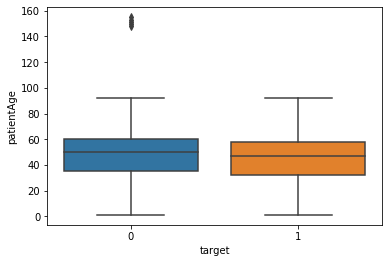

In [10]:
sns.boxplot(labels_cons_pd['target'], labels_cons_pd['patientAge'])
#sns.distplot(label_data['patientAge'],bins=10)

In [11]:
!pip install mrcnn

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn.model import MaskRCNN
from mrcnn import visualize
from mrcnn.config import Config

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-cp36-none-any.whl size=54931 sha256=268d05fd04faddfad4c0a83d1fc5481820691b0660f2b3ac979cfc08efa37885
  Stored in directory: /root/.cache/pip/wheels/11/ed/28/e550ddc897c04c336b923eae4eb35c9aae993d20ce39d9cc40
Successfully built mrcnn


Using TensorFlow backend.


In [0]:
class DetectorDataset(utils.Dataset):
    """Dataset class for training pneumonia detection on the RSNA pneumonia dataset.
    """

    def __init__(self, dataset_pd, orig_height, orig_width):
        super().__init__(self)
        
        # Add classes
        self.add_class('pneumonia', 1, 'Lung Opacity')
        
        # add images 
        for i,x in dataset_pd.iterrows():
            annotations = x
            self.add_image('pneumonia', image_id=i, path=x['filePath'], 
                           annotations=annotations, orig_height=orig_height, orig_width=orig_width)
            
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def load_image(self, image_id):
        info = self.image_info[image_id]
        fp = info['path']
        image = cv2.imread(fp)
        return image

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        annotations = info['annotations']
        count = len(annotations['bboxes'])
        if count == 0:
            mask = np.zeros((info['orig_height'], info['orig_width'], 1), dtype=np.uint8)
            class_ids = np.zeros((1,), dtype=np.int32)
        else:
            mask = np.zeros((info['orig_height'], info['orig_width'], count), dtype=np.uint8)
            class_ids = np.zeros((count,), dtype=np.int32)
            if(annotations['target'] == 1):
              bb_array = np.array(ast.literal_eval(annotations['bboxes']))
              for i, a in enumerate(bb_array):
                x1 = int(a[0])
                x2 = int(a[1])
                y1 = int(a[2])
                y2 = int(a[3])
                mask_instance = mask[:, :, i].copy()
                mask_instance = cv2.rectangle(mask_instance, (x1, y1), (x2, y2), 255,-1)
                mask[:, :, i] = mask_instance
                class_ids[i] = 1
        return mask.astype(np.bool), class_ids.astype(np.int32)


In [0]:
dataset_train = DetectorDataset(labels_cons_pd.iloc[:20000], 1024, 1024)
dataset_train.prepare()



In [0]:
dataset_val = DetectorDataset(labels_cons_pd.iloc[20000:], 1024, 1024)
dataset_val.prepare()

In [15]:

print(labels_cons_pd.iloc[20000,1])
np.array(ast.literal_eval(labels_cons_pd.iloc[20000,1]))

[[0.0, 0.0, 0.0, 0.0]]


array([[0., 0., 0., 0.]])

(1024, 1024, 3)
/content/drive/My Drive/Colab Notebooks/Capstone/train_images/70d7f4df-5497-4205-a36b-e47b58145fa2.jpg
10307
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


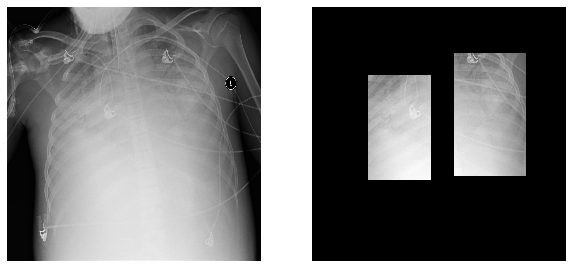

In [86]:
import random
class_ids = [0]
while class_ids[0] == 0:  ## look for a mask
    image_id = random.choice(dataset_train.image_ids)
    image_fp = dataset_train.image_reference(image_id)
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    #print()

print(image.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
masked = np.zeros(image.shape[:2])
for i in range(mask.shape[2]):
    masked += image[:, :, 0] * mask[:, :, i]
plt.imshow(masked, cmap='gray')
plt.axis('off')

print(image_fp)
print(image_id)
print(class_ids)

In [17]:

# define the test configuration
class DetectorConfig(Config):
    """Configuration for training pneumonia detection on the RSNA pneumonia dataset.
    Overrides values in the base Config class.
    """
    
    # Give the configuration a recognizable name  
    NAME = 'pneumonia'
    
    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    BACKBONE = 'resnet50'
    
    NUM_CLASSES = 2  # background + 1 pneumonia classes
    
    IMAGE_MIN_DIM = 1024
    IMAGE_MAX_DIM = 1024
    #RPN_ANCHOR_SCALES = (16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 4
    DETECTION_MAX_INSTANCES = 3
    DETECTION_MIN_CONFIDENCE = 0.78  ## match target distribution
    DETECTION_NMS_THRESHOLD = 0.01

    STEPS_PER_EPOCH = 200

config = DetectorConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        3
DETECTION_MIN_CONFIDENCE       0.78
DETECTION_NMS_THRESHOLD        0.01
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [21]:
m_rcnn = modellib.MaskRCNN(mode="training",model_dir=project_path + 'mrcnn/', config=config)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [22]:
m_rcnn.load_weights(project_path + 'mrcnn/mask_rcnn_coco.h5', by_name=True, exclude=[
    "mrcnn_class_logits", "mrcnn_bbox_fc",
    "mrcnn_bbox", "mrcnn_mask"])

In [0]:

LEARNING_RATE = 0.006

# Train Mask-RCNN Model 
import warnings 
warnings.filterwarnings("ignore")

In [24]:
%%time
## train heads with higher lr to speedup the learning
m_rcnn.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE*2,
            epochs=1,
            layers='heads',
            augmentation=None)  ## no need to augment yet

history = model.keras_model.history.history


Starting at epoch 0. LR=0.012

Checkpoint Path: /content/drive/My Drive/Colab Notebooks/Capstone/mrcnn/pneumonia20200220T1132/mask_rcnn_pneumonia_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4 

NameError: ignored

In [27]:
history = m_rcnn.keras_model.history.history
history

{'loss': [2.732838177680969],
 'mrcnn_bbox_loss': [0.841500183865428],
 'mrcnn_class_loss': [0.47713880048322366],
 'mrcnn_mask_loss': [0.6764244408160448],
 'rpn_bbox_loss': [0.7072878305241466],
 'rpn_class_loss': [0.030485151140019297],
 'val_loss': [2.5318992495536805],
 'val_mrcnn_bbox_loss': [0.4523960018157959],
 'val_mrcnn_class_loss': [0.3005803269147873],
 'val_mrcnn_mask_loss': [0.4605860733985901],
 'val_rpn_bbox_loss': [1.2937339639663696],
 'val_rpn_class_loss': [0.024600674100220203]}

In [18]:
saved_weights = project_path + 'mrcnn/mask_rcnn_capstone.h5'
#print(saved_weights)
m_rcnn.keras_model.save_weights(saved_weights)
#model.keras_model.save_weights(model_path)

NameError: ignored

In [19]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
model_infr = modellib.MaskRCNN(mode="inference",model_dir=project_path + 'mrcnn/', config=config)
# loading the trained weights o the custom dataset
model_infr.load_weights(saved_weights, by_name=True)









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








In [0]:
temp_image_id = [15532,7434,10307]
result = []
for i in temp_image_id:
  temp_image_fp = dataset_train.image_reference(i)
  temp_image = dataset_train.load_image(i)
  result.append(model_infr.detect([temp_image]))


In [97]:
print(result[0][0]['rois'])
print(result[0][0]['scores'])
print(labels_cons_pd.iloc[temp_image_id[0],1])

[[258 539 942 904]
 [136  73 878 425]]
[0.8054234 0.7845691]
[[168.0, 427.0, 460.0, 756.0]]


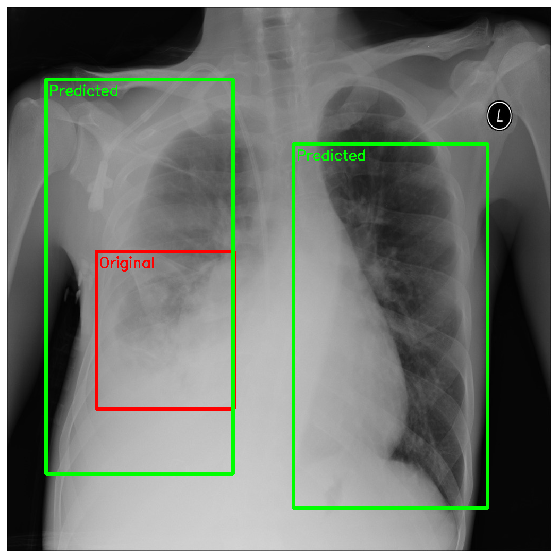

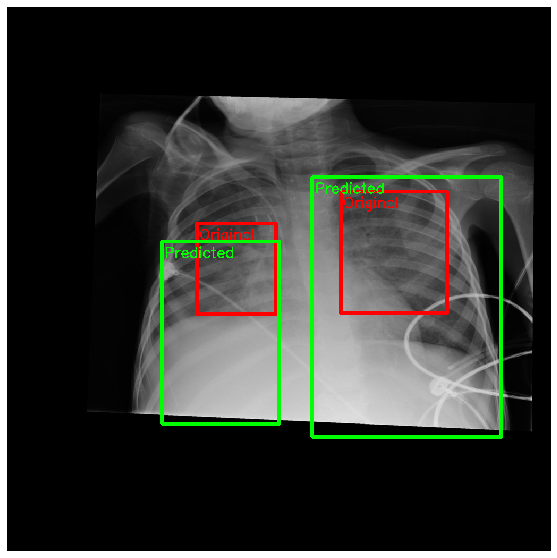

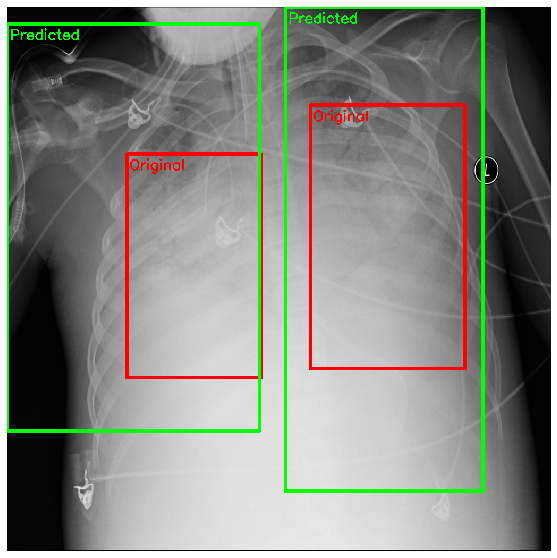

In [98]:
for c,i in enumerate(temp_image_id):
  temp_image = dataset_train.load_image(i)
  plt.figure(figsize=(10, 10))
  bbx = np.array(ast.literal_eval(labels_cons_pd.iloc[i,1]),dtype=int)
  for x in bbx:
    cv2.rectangle(temp_image,(x[0],x[2]),(x[1],x[3]),(255,0,0),5)
    cv2.putText(temp_image, 'Original', (x[0]+5,x[2]+30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)
  for x in result[c][0]['rois']:
    cv2.rectangle(temp_image,(x[1],x[0]),(x[3],x[2]),(0,255,0),5)
    cv2.putText(temp_image, 'Predicted', (x[1]+5,x[0]+30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
  plt.imshow(temp_image)
  plt.axis('off')
